In [1]:
#importing all my packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from PIL import Image
from scipy import ndimage
import imageio

In [2]:
#importing my sea level data from https://datahub.io/core/sea-level-rise#python
file = pd.read_csv('/Users/sofiac/OneDrive - Cal State LA/20-21 F Astro 4900/Final Project/sea-level-rise_zip/data/epa-sea-level_csv.csv')
file

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648


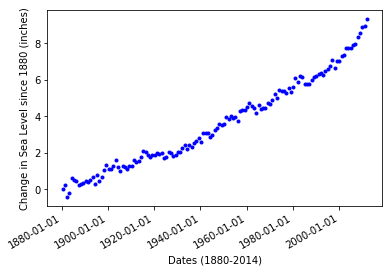

In [3]:
#Selecting just the dates for my x-axis, stoppping at the penultimate line (see above)
tim = file.iloc[:133,0] 
#Selecting just the sea levels from the second column with same dimensions as tim
y = file.iloc[:133,1] 

#Telling the computer what format it should be looking for 
date_fmt = '%Y-%m-%d'
dt_x = [dt.datetime.strptime(str(i), date_fmt) for i in tim]
x = [mdates.date2num(i) for i in dt_x] #defining my x-axis

#formatting the plot to understand dates
fig, ax = plt.subplots()
ax.plot_date(x, y, 'b.')
date_formatter = mdates.DateFormatter('%Y-%m-%d') 
ax.xaxis.set_major_formatter(date_formatter)

#Cosmetics
fig.autofmt_xdate() #angled ticks so it looks good
plt.xlabel('Dates (1880-2014)')
plt.ylabel('Change in Sea Level since 1880 (inches)')
plt.savefig('totalSLgraph.png')
plt.show()


In [4]:
#All following maps are taken from https://en-gb.topographic-map.com/
LAimage = '/Users/sofiac/OneDrive - Cal State LA/20-21 F Astro 4900/Final Project/maps/blnk1.png'

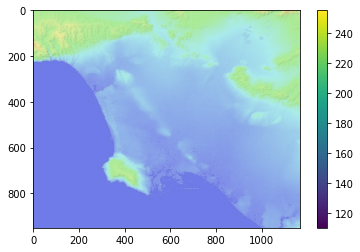

In [5]:
map1 = Image.open(LAimage) 
map1_data = np.array(map1)
plt.imshow(map1_data[:,:,:])
plt.colorbar()

In [6]:
print('min: ',np.min(map1_data))
print('max: ',np.max(map1_data))

min:  110
max:  255


In [9]:
#On to editing maps!
LAim = imageio.imread('maps/blnk1.png')

In [10]:
#creating a function so I don't have to keep typing this editing tool
def sealevel(x,title):
    mn = np.min(x)
    mx = np.max(x)
    tr = np.arange(mn,mx)
    images = []
    for i in tr:
        mapn = np.array(x)
        mapn[mapn<=i] = mn
        images.append(mapn)
    #saves a gif directly to the folder this script is in
    return imageio.mimsave(title, images) 

In [11]:
sealevel(LAim, 'LA.gif') #no output because it saves to my folder

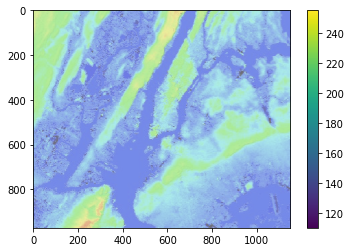

In [12]:
#Just confirming the image is loading properly
NYCimage = '/Users/sofiac/OneDrive - Cal State LA/20-21 F Astro 4900/Final Project/maps/NYC.png'
mapNYC1 = Image.open(NYCimage) 
mapNY1 = np.array(mapNYC1)
plt.imshow(mapNY1[:,:,:])
plt.colorbar()

In [21]:
NYCim = imageio.imread('maps/NYC.png')
sealevel(NYCim, 'NYC.gif')

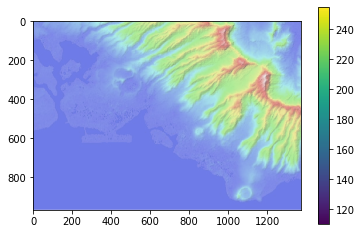

In [24]:
#Just confirming the image is loading properly
HIimage = '/Users/sofiac/OneDrive - Cal State LA/20-21 F Astro 4900/Final Project/maps/Honolulu.png'
mapHI1 = Image.open(HIimage) 
mapHI = np.array(mapHI1)
plt.imshow(mapHI[:,:,:])
plt.colorbar()

In [36]:
HIim = imageio.imread('maps/Honolulu.png')
sealevel(HIim, 'HI.gif')

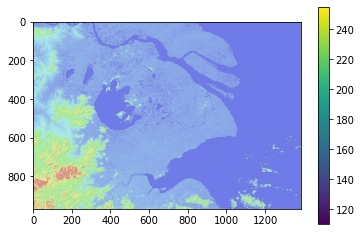

In [13]:
#Just confirming the image is loading properly
SHimage = '/Users/sofiac/OneDrive - Cal State LA/20-21 F Astro 4900/Final Project/maps/Shanghai.png'
mapSH1 = Image.open(SHimage) 
mapSH = np.array(mapSH1)
plt.imshow(mapSH[:,:,:])
plt.colorbar()

In [16]:
SHim = imageio.imread('maps/Shanghai.png')
sealevel(SHim, 'SH.gif')